<h2><center> South African Language Identification </h2></center>

<h3><center> Dennis Gitari </h3></center>

In [3]:
import pandas as pd                                                                # import pandas module
import seaborn as sns                                                              # seaborn for advanced visuals 
import matplotlib.pyplot as plt                                                    # matplotlib package
import re                                                                          # work with regular expressions
import numpy as np
                                                             
from sklearn import preprocessing                                                  # assist in label encoding
from sklearn.feature_extraction.text import CountVectorizer                        # assist in creating bag of words
from sklearn.model_selection import train_test_split                               # split the data set
from sklearn.naive_bayes import MultinomialNB                                      # Naive Bayes model package
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report     # Model evaluation


import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth',200)                                           # incrase width od viewed output

### Load the data

In [4]:
train = pd.read_csv('train_set.csv') #training data set

test = pd.read_csv('test_set.csv') #test data set

samplesubmission = pd.read_csv('sample_submission.csv')

>let us look at our data generally

In [5]:
train.head(3)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekang...
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian...


In [6]:
test.head(3)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlelela kgato eo."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho.
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.


In [7]:
samplesubmission

,index,lang_id
0,1,tsn
1,2,nbl





.

 . 
     
         

#### Lets us look at the distribution of target variable

. 

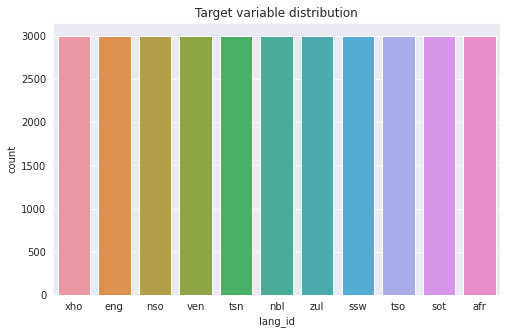

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(train["lang_id"])

plt.title('Target variable distribution')

plt.show()
train["lang_id"].value_counts()

>from the above graph, it is clear the target variables of the train data are different values are evenly didtributed

. 

Test data has unique indes for each row

>each row has a different index

.
 

#### Lets us look at the shapes of the data sets given

. 

In [9]:
train.shape, test.shape, samplesubmission.shape

((33000, 2), (5682, 2), (2, 2))

. 

#### Lets separate the data and target variable

. 

. 

In [10]:
X = train['text']

y = train['lang_id']

In [11]:
type(X)

pandas.core.series.Series

. 

Encode 'lang_id' column since its in categorical form

. 

>preprocess the data

. 

In [12]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [13]:
len(data_list)

33000

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(data_list[:6500]).toarray()         #limit data to allow for storage allocation on RAM
X.shape # (10337, 39419)

(6500, 53005)

In [15]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
X.shape

(6500, 53005)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X[:6500], y[:6500], test_size = 0.20) #split the data set

In [18]:
nbm = MultinomialNB() #create a naive bayes model instance

nbm.fit(X_train, y_train) # Naive bayes is best for multiclass lassificatio

MultinomialNB()

In [19]:
nbm.score(X_test, y_test) #predict data to compare with actual results

0.9992307692307693

In [20]:
y_pred = nbm.predict(X_test)     #predict using the model

In [21]:
ac = accuracy_score(y_test, y_pred)     #create an accuracy score instance
cm = confusion_matrix(y_test, y_pred)     #create a confusion matrix instance


In [22]:
print("Accuracy is :",ac)

Accuracy is : 0.9992307692307693


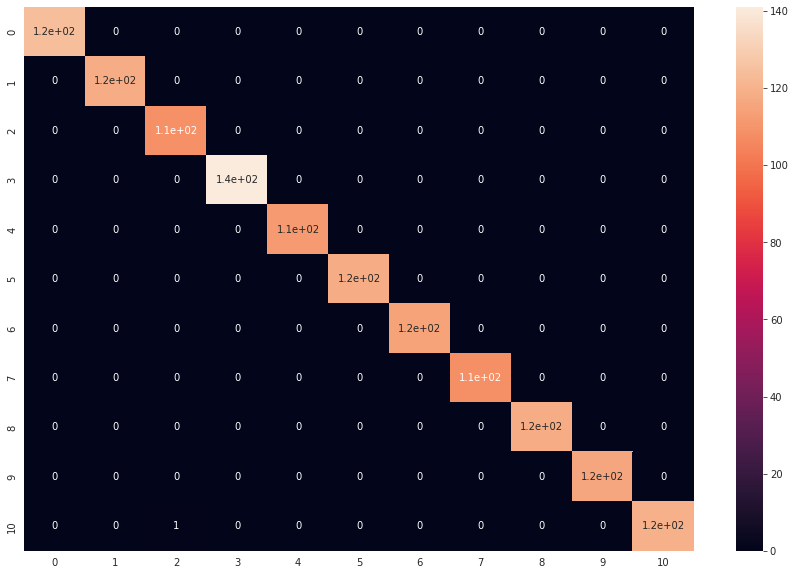

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [24]:

print(f'{classification_report(y_test, y_pred)}')

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       124
         eng       1.00      1.00      1.00       118
         nbl       0.99      1.00      1.00       109
         nso       1.00      1.00      1.00       141
         sot       1.00      1.00      1.00       112
         ssw       1.00      1.00      1.00       118
         tsn       1.00      1.00      1.00       115
         tso       1.00      1.00      1.00       108
         ven       1.00      1.00      1.00       118
         xho       1.00      1.00      1.00       116
         zul       1.00      0.99      1.00       121

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



In [25]:
X1 = test['text']

In [26]:
# creating a list for appending the preprocessed text
data_list1 = []
# iterating through all the text
for text in X1:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list1.append(text)

In [27]:
X1 = cv.transform(data_list1).toarray()         #limit data to allow for storage allocation on RAM
X1.shape

(5682, 53005)

In [28]:
y_pred1 = nbm.predict(X1)
y_pred1 

array(['tsn', 'nbl', 'ven', ..., 'sot', 'sot', 'tso'], dtype='<U3')

In [29]:
i = test['index']
i

0          1
1          2
2          3
3          4
4          5
        ... 
5677    5678
5678    5679
5679    5680
5680    5681
5681    5682
Name: index, Length: 5682, dtype: int64

In [30]:
j = y_pred1

In [31]:
sub_file = {'index':i,
            'lang_id': j}

In [32]:
sub_files = pd.DataFrame(sub_file)
sub_files

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot


In [34]:
sub_files.to_csv('DennisSubmission8.csv', index = False)